![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Use K Means Clustering for Unsupervised Learning

## 1 - Import necessary packages

Let's first import all the packages that you will need during this assignment.

- **numpy** is the main package for scientific computing with Python.
- **matplotlib** is a library to plot graphs in Python.
- **sklearn** features various algorithms of machine learning in Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Load Dataset

Generate  random blobs of points by determining number of clusters and plot it out to visualize.

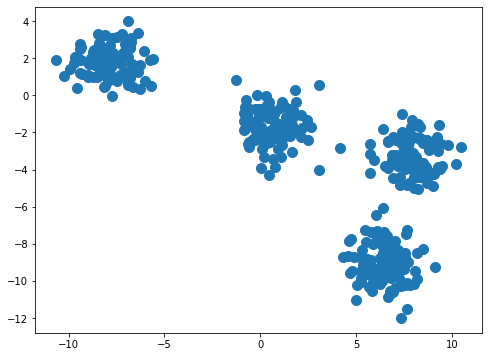

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=1.0, random_state=6)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=100)

## 3 - K Means Clustering

Import scikit learn's K Means clustering algorithm and train the model.

In [4]:
# TODO: Replace {} with ypur solution to import K Means clustering algorithm
from sklearn.cluster import KMeans 

Specify number of cluster to 4

In [5]:
# TODO: Replace {} with ypur solution to specify the number of clusters to 4
num_clusters = 4

## 4 - Train Model

Train the KMeans clustering model.

In [6]:
# TODO: Replace {} with your solution to implement KMeans clustering model
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
model.fit(X)

KMeans(n_clusters=4)

> `init` specify method for initialization. **K-means++** selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. It avoiding the sometimes poor clusterings found by the standard k-means algorithm. 

## 5 - Make Prediction

Perform the prediction by using the trained model.

In [7]:
# Step size of the mesh 
step_size = 0.01 
 
# Plot the Decision Boundaries 
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1 
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)) 
 
# Predict labels for all points in the mesh 
predictions = model.predict(np.c_[x_values.ravel(), y_values.ravel()]) 

## 6 - Plot Result

Draw the ground truth and draw the predictions by using decision boundaries to represent the respective clusters.

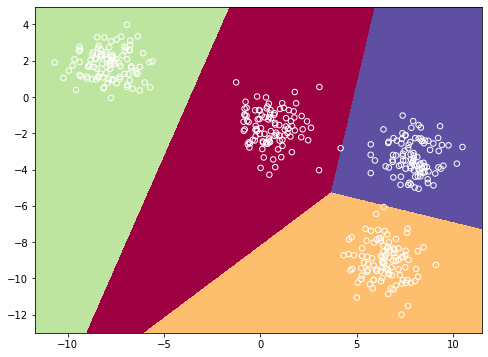

In [8]:
# Plot the results 
predictions = predictions.reshape(x_values.shape) 
plt.figure(figsize=(8,6)) 
plt.imshow(predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
           cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 
plt.scatter(X[:,0], X[:,1], marker='o', 
    facecolors='none', edgecolors='w', s=30) 

Draw the centroids by using model.**cluster_centers_**.

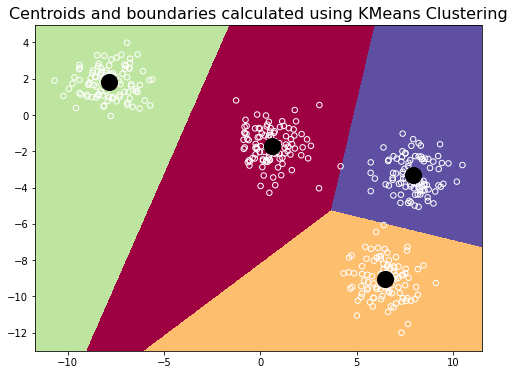

In [9]:
# Plot the boundaries 
predictions = predictions.reshape(x_values.shape) 
plt.figure(figsize=(8,6)) 
plt.imshow(predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
           cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 
plt.scatter(X[:,0], X[:,1], marker='o', 
            facecolors='none', edgecolors='w', s=30) 

# TODO: Replace {} with your solution to plot the centroids of the clusters
centroids = model.cluster_centers_ 
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3, 
            color='k', zorder=10, facecolors='black') 
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1 
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1 
plt.title('Centroids and boundaries calculated using KMeans Clustering', fontsize=16) 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.show() 

> Take note of the **inertia_** which is the **sum of squared distance from each point to their corresponding center**.

In [10]:
model.inertia_

738.1090452755723

In [11]:
k_values = np.arange(2,10)
inertia = []

# TODO: Replace {} with your solution to store model's inertia into inertia list
for k in k_values:
    model = KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

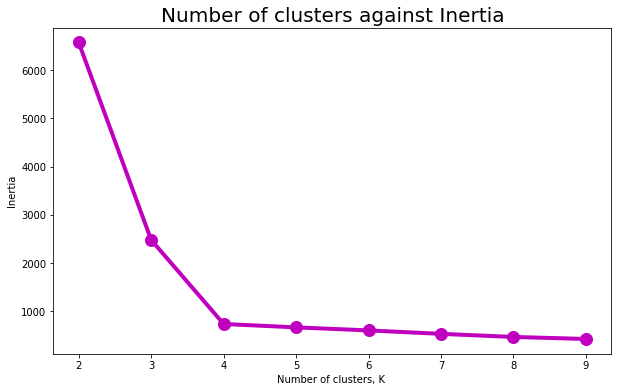

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia,"o-m", linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia", fontsize=20)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

By following the elbow rule, we will choose 4 as our number of clusters(K). If we choose 5 or more, the inertia would not decrease significantly. 

# Exercise: Customer Clustering Analysis

> Dataset from Kaggle: [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

## 1 - Load Dataset

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [15]:
df.shape

(200, 5)

> This dataset has 200 examples with 5 features

Make sure the dataset has no null value.

In [16]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2 - Segmentation by Age and Spending Score

In [17]:
X = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values

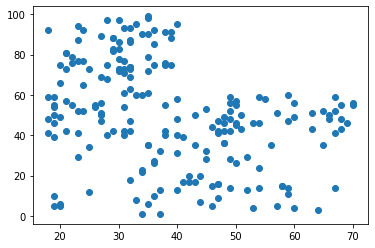

In [18]:
plt.scatter(X[:, 0], X[:, 1], marker='o')

> From the plot, we can aggregated the customers into 4 different categories, which are Priority Customers, Young Target Customers, Senior Target Customers, and Normal Customers.

## 3 - K Means Clustering

In [19]:
# TODO: Replace {} with your solution to specify number of clusters
k = 4

In [20]:
# TODO: Replace {} with your solution to specify 'k-means++' for initialization method
model = KMeans(init='k-means++', n_clusters=k, n_init=10)

# TODO: Replace {} with your solution to fit data into the model
model.fit(X)

KMeans(n_clusters=4)

In [21]:
# TODO: Replace {} with your solution to specify 0.01 step size of the mesh 
step_size = 0.01 

In [22]:
# Plot the Decision Boundaries 
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1 
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                                 np.arange(y_min, y_max, step_size)) 
 
# TODO: Replace {} with your solution to predict labels for all points in the mesh 
predictions = model.predict(np.c_[x_values.ravel(), y_values.ravel()]) 

## 4 - Plotting

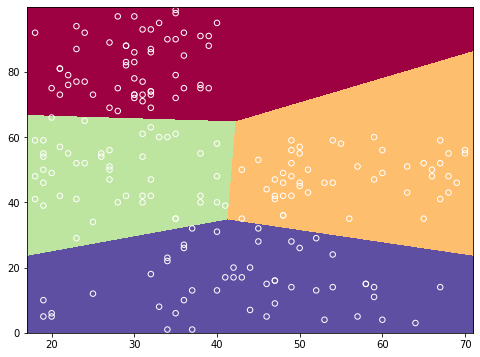

In [23]:
# Plot the results 
predictions = predictions.reshape(x_values.shape) 
plt.figure(figsize=(8,6)) 
plt.imshow(predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
           cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 
plt.scatter(X[:,0], X[:,1], marker='o', 
            facecolors='none', edgecolors='w', s=30) 

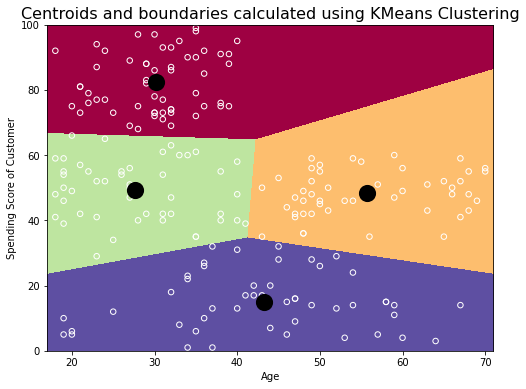

In [24]:
# Plot the boundaries 
predictions = predictions.reshape(x_values.shape) 
plt.figure(figsize=(8,6)) 
plt.imshow(predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
           cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 
plt.scatter(X[:,0], X[:,1], marker='o', 
            facecolors='none', edgecolors='w', s=30) 

# Plot the centroids of the clusters
centroids = model.cluster_centers_ 
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, 
            linewidths=3, color='k', zorder=10, facecolors='black') 
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1 
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1 
plt.title('Centroids and boundaries calculated using KMeans Clustering', fontsize=16) 
plt.xlabel('Age')
plt.ylabel('Spending Score of Customer')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.show() 

Result analysis:

- The most top cluster is Priority Customers, the customers belong to this cluster has higher spending score of above 70.
- The centre left cluster is Young Target Customers. The customers belong to this cluster are around age 15-45 with spending score of 25-70.
- The centre right cluster is Senior Target Customers. The customers belong to this cluster are above 45 age with spending score between 25-70.
- The bottom cluster is Normal Customers. The customers belong to this cluster have lower spending score of below 30.

We can use different marketing strategies to optimize the spending score of the customers in the mall!

In [25]:
# TODO: Replace {} with your solution to check model's inertia
model.inertia_

28165.583566629342

In [26]:
# TODO: Replace {} with your solution to append inertia into the list
k_values = np.arange(2,10)
inertia = []
for k in k_values:
    model = KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

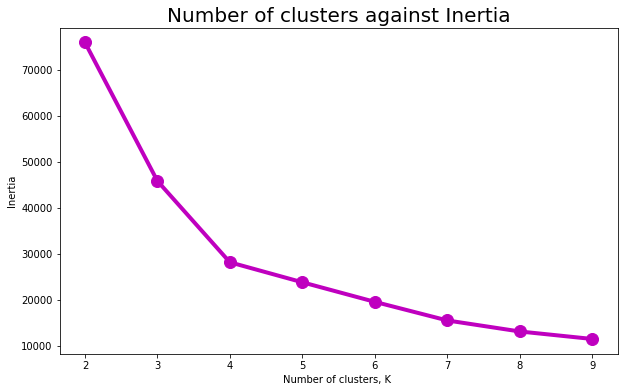

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia,"o-m", linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia", fontsize=20)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

By following the elbow rule, we will choose 4 as our number of clusters(K). If we choose 5 or more, the inertia would not decrease significantly. 